In [108]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
# Download dataset

!wget "https://dados.agricultura.gov.br/dataset/c7784a6e-f0ec-4196-a1ce-1d2d4784a58e/resource/6ab20c11-73a0-4ab0-8e13-2420d48dd6f5/download/sigefcamposproducaodesementes.csv" -O dataset.csv 

--2023-05-29 23:44:29--  https://dados.agricultura.gov.br/dataset/c7784a6e-f0ec-4196-a1ce-1d2d4784a58e/resource/6ab20c11-73a0-4ab0-8e13-2420d48dd6f5/download/sigefcamposproducaodesementes.csv
Resolving dados.agricultura.gov.br (dados.agricultura.gov.br)... 201.57.198.178
Connecting to dados.agricultura.gov.br (dados.agricultura.gov.br)|201.57.198.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46659404 (44M) [text/csv]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  44.50M   865KB/s    in 54s     

2023-05-29 23:45:24 (844 KB/s) - ‘dataset.csv’ saved [46659404/46659404]



In [110]:
import pandas as pd
import numpy as np

#1.1. Carregamento e limpeza dos dados

In [111]:
df = pd.read_csv("/content/dataset.csv", sep=';')
df.head()

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Status,Data do Plantio,Data de Colheita,Area,Producao bruta,Producao estimada
0,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,01/01/2013,NaN,9.5,NaN,38.00
1,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,05/01/2013,NaN,6.0,NaN,24.00
2,2013/2013,Zea mays L.,S1,BRS 2022,Cedro,PE,Homologado,10/01/2013,NaN,9.5,NaN,38.00
3,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,03/02/2013,NaN,4.5,NaN,15.75
4,2013/2013,Zea mays L.,S2,BRS Gorutuba,Petrolina,PE,Homologado,27/01/2013,NaN,1.6,NaN,5.60


In [112]:
df.shape

(442174, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442174 entries, 0 to 442173
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Safra              442174 non-null  object 
 1   Especie            442174 non-null  object 
 2   Categoria          442151 non-null  object 
 3   Cultivar           442174 non-null  object 
 4   Municipio          442169 non-null  object 
 5   UF                 442174 non-null  object 
 6   Status             442174 non-null  object 
 7   Data do Plantio    442174 non-null  object 
 8   Data de Colheita   113515 non-null  object 
 9   Area               442174 non-null  float64
 10  Producao bruta     113515 non-null  float64
 11  Producao estimada  442174 non-null  float64
dtypes: float64(3), object(9)
memory usage: 40.5+ MB


In [114]:
df.rename(columns={
   "Data do Plantio":"Data_Plantio",
   "Data de Colheita":"Data_Colheita",
   "Producao bruta":"Producao_Bruta",
   "Producao estimada":"Producao_Estimada"
}, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442174 entries, 0 to 442173
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Safra              442174 non-null  object 
 1   Especie            442174 non-null  object 
 2   Categoria          442151 non-null  object 
 3   Cultivar           442174 non-null  object 
 4   Municipio          442169 non-null  object 
 5   UF                 442174 non-null  object 
 6   Status             442174 non-null  object 
 7   Data_Plantio       442174 non-null  object 
 8   Data_Colheita      113515 non-null  object 
 9   Area               442174 non-null  float64
 10  Producao_Bruta     113515 non-null  float64
 11  Producao_Estimada  442174 non-null  float64
dtypes: float64(3), object(9)
memory usage: 40.5+ MB


In [116]:
df.nunique().sort_values()

Status                   5
Categoria                6
Safra                   22
UF                      26
Especie                278
Municipio             2133
Data_Colheita         4087
Data_Plantio          6569
Cultivar             10142
Area                 14488
Producao_Estimada    29000
Producao_Bruta       53474
dtype: int64

In [117]:
df.isna().sum()

Safra                     0
Especie                   0
Categoria                23
Cultivar                  0
Municipio                 5
UF                        0
Status                    0
Data_Plantio              0
Data_Colheita        328659
Area                      0
Producao_Bruta       328659
Producao_Estimada         0
dtype: int64

In [118]:
df.dtypes

Safra                 object
Especie               object
Categoria             object
Cultivar              object
Municipio             object
UF                    object
Status                object
Data_Plantio          object
Data_Colheita         object
Area                 float64
Producao_Bruta       float64
Producao_Estimada    float64
dtype: object

In [119]:
df.drop(columns=['Data_Colheita', 'Producao_Bruta', 'Status'], inplace=True)

In [120]:
df['Categoria'].unique()

array(['S1', 'S2', 'C1', 'Básica', 'Genética', 'C2', nan], dtype=object)

In [121]:
df['Categoria'].replace(np.nan, 'Outro', inplace=True)

In [122]:
df.loc[df['Municipio'].isna()]

,Safra,Especie,Categoria,Cultivar,Municipio,UF,Data_Plantio,Area,Producao_Estimada
13097,2013/2013,Lolium multiflorum Lam.,Genética,Santa Maria,NaN,RS,01/03/2013,30.00,32.0
87787,2013/2013,Zea mays L.,C1,AL Bandeirante,NaN,SP,16/01/2013,10.00,50.0
211876,2018/2018,Zea mays L.,S2,ANHEMBI,NaN,DF,16/03/2018,65.00,390.0
212748,2018/2018,Zea mays L.,S1,M 274,NaN,DF,18/03/2018,95.00,570.0
315134,2020/2021,Urochloa brizantha (Hochst. ex A. Rich.) R. D....,S2,Marandú,NaN,GO,28/11/2018,201.81,250.0


In [123]:
most_frequent_municipio = df.groupby('UF')['Municipio'].apply(lambda x: x.value_counts().idxmax())
most_frequent_municipio

UF
AC           Rio Branco
AL               Anadia
AM     Rio Preto da Eva
BA        São Desidério
CE    Limoeiro do Norte
DF             Brasília
ES    Marechal Floriano
GO           Cristalina
MA               Balsas
MG             Paracatu
MS           Ponta Porã
MT          Alto Garças
PA          Paragominas
PB                Sousa
PE            Petrolina
PI       Sebastião Leal
PR         Mangueirinha
RJ             Itaocara
RN    Alto do Rodrigues
RO          Porto Velho
RR          Alto Alegre
RS     São Luiz Gonzaga
SC         Campos Novos
SE              Lagarto
SP              Itapeva
TO    Lagoa da Confusão
Name: Municipio, dtype: object

In [124]:
df.loc[(df['Municipio'].isna()) & (df['UF'] == 'DF'), 'Municipio'] = 'Brasília'
df.loc[(df['Municipio'].isna()) & (df['UF'] == 'SP'), 'Municipio'] = 'Itapeva'
df.loc[(df['Municipio'].isna()) & (df['UF'] == 'RS'), 'Municipio'] = 'São Luiz Gonzaga'
df.loc[(df['Municipio'].isna()) & (df['UF'] == 'GO'), 'Municipio'] = 'Cristalina'

In [125]:
df.isna().sum()

Safra                0
Especie              0
Categoria            0
Cultivar             0
Municipio            0
UF                   0
Data_Plantio         0
Area                 0
Producao_Estimada    0
dtype: int64

In [134]:
day_all = []
month_all = []
year_all = []

for data in df['Data_Plantio']:
  day, month, year = data.split('/')
  day_all.append(day)
  month_all.append(month)
  year_all.append(year)

df['Dia_Plantio'] = day_all
df['Mes_Plantio'] = month_all
df['Ano_Plantio'] = year_all

df['Dia_Plantio'] = df['Dia_Plantio'].astype(float)
df['Mes_Plantio'] = df['Mes_Plantio'].astype(float)
df['Ano_Plantio'] = df['Ano_Plantio'].astype(float)

In [137]:
df.drop(columns='Data_Plantio', inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442174 entries, 0 to 442173
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Safra              442174 non-null  object 
 1   Especie            442174 non-null  object 
 2   Categoria          442174 non-null  object 
 3   Cultivar           442174 non-null  object 
 4   Municipio          442174 non-null  object 
 5   UF                 442174 non-null  object 
 6   Area               442174 non-null  float64
 7   Producao_Estimada  442174 non-null  float64
 8   Dia_Plantio        442174 non-null  float64
 9   Mes_Plantio        442174 non-null  float64
 10  Ano_Plantio        442174 non-null  float64
dtypes: float64(5), object(6)
memory usage: 37.1+ MB


#1.2. Análise Exploratória dos Dados (EDA)

In [139]:
import matplotlib.pyplot as plt

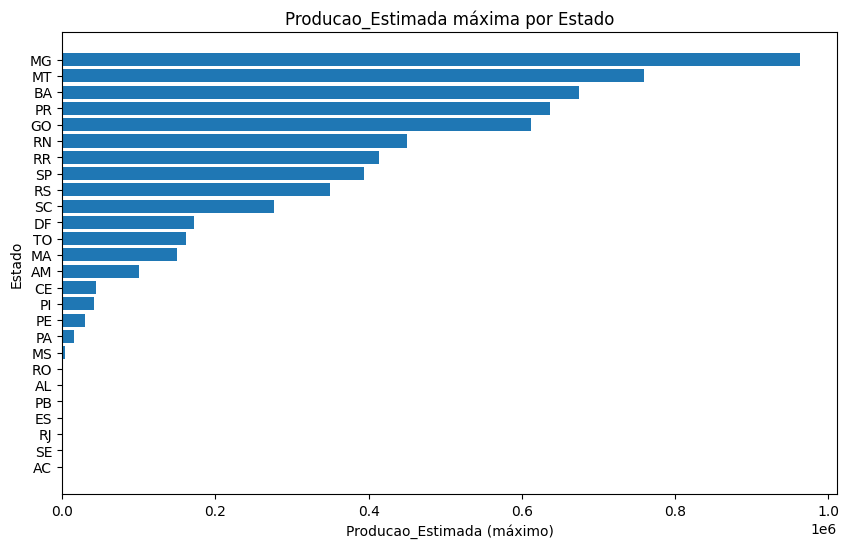

In [140]:
max_producao_estimada = df.groupby('UF')['Producao_Estimada'].max().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(max_producao_estimada.index, max_producao_estimada.values)
plt.xlabel('Producao_Estimada (máximo)')
plt.ylabel('Estado')
plt.title('Producao_Estimada máxima por Estado')

plt.show()

### Minas Gerais e Mato Grosso com a maior estimativa de produção

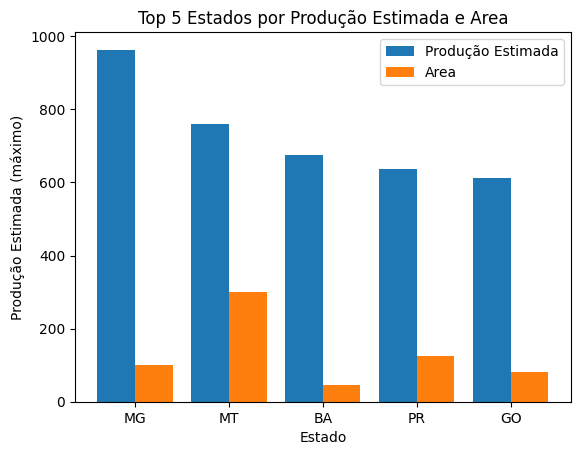

In [141]:
top_producao_estimada = df.groupby('UF')['Producao_Estimada'].max().nlargest(5)
top_area = df[df['UF'].isin(top_producao_estimada.index)].groupby('UF')['Area'].first()

plt.show()

X_axis = np.arange(len(top_producao_estimada))

## Escala de Produção dividida por 1000

plt.bar(X_axis - 0.2, top_producao_estimada.values / 1000, 0.4, label = 'Produção Estimada')
plt.bar(X_axis + 0.2, top_area.values, 0.4, label = 'Area')
  
plt.xticks(X_axis, top_producao_estimada.index)
plt.xlabel("Estado")
plt.ylabel("Produção Estimada (máximo)")
plt.title("Top 5 Estados por Produção Estimada e Area")
plt.legend()
plt.show()

### A Area, apesar de dar esse indício, não está diretamente correlacionado com a produção estimada. Mas está relacionada com o local de produção, como vemos no gráfico anterior, pelos 5 maiores serem realmente os maiores produtores: Minas Gerais, Mato Grosso, Bahia, Paraná, Goiânia. 

In [142]:
df['Safra'].unique()

array(['2013/2013', '2013/2014', '2022/2023', '2014/2014', '2022/2022',
       '2021/2022', '2014/2015', '2015/2016', '2015/2015', '2016/2016',
       '2020/2021', '2020/2020', '2016/2017', '2017/2017', '2017/2018',
       '2018/2019', '2018/2018', '2019/2019', '2019/2020', '2021/2021',
       '2023/2023', '2023/2024'], dtype=object)

In [ ]:
top_producao_safra = df.groupby('Safra')['Producao_Estimada'].max().nlargest(10)
top_producao_safra

### Maior Safra foi relativa ao ano de 2022, com as 3 maiores estimativas de produção

# 1.3. Modelagem utilizando PyCaret

In [144]:
from pycaret.regression import *

In [145]:
df.drop(columns=['Safra'], inplace=True)

In [147]:
s = setup(  data = df, 
            target = 'Producao_Estimada',  
            remove_outliers = True,
            normalize = True, 
            categorical_features = ['Especie', 'Categoria', 'Cultivar', 'Municipio', 'UF'],
            session_id = 123
            )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Description,Value
0,Session id,123
1,Target,Producao_Estimada
2,Target type,Regression
3,Original data shape,"(442174, 10)"
4,Transformed data shape,"(426698, 16)"
5,Transformed train set shape,"(294045, 16)"
6,Transformed test set shape,"(132653, 16)"
7,Numeric features,4
8,Categorical features,5
9,Preprocess,True


In [148]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [149]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,358.4243,59335409.3228,7558.9927,0.0685,1.0698,443.9758,3.2920
et,Extra Trees Regressor,339.4385,60977227.9661,7643.9285,0.0474,0.6657,321.7856,209.4490
ridge,Ridge Regression,285.3538,64268072.6013,7837.4759,0.0096,1.3116,375.9630,2.0200
lar,Least Angle Regression,285.3541,64268072.0100,7837.4758,0.0096,1.3116,375.9639,1.2490
lr,Linear Regression,285.3470,64268042.5829,7837.4720,0.0096,1.3116,376.0453,19.7170
lasso,Lasso Regression,284.1508,64270123.9276,7837.5879,0.0095,1.3033,369.7899,18.6730
llar,Lasso Least Angle Regression,284.1511,64270121.4306,7837.5877,0.0095,1.3033,370.0899,1.2240
br,Bayesian Ridge,284.6940,64269209.6480,7837.5489,0.0095,1.3060,374.2886,1.3810
en,Elastic Net,278.2958,64360103.7194,7843.2379,0.0081,1.2058,266.0096,1.1940
knn,K Neighbors Regressor,246.3125,64932759.0000,7860.6350,0.0067,0.6526,119.6989,120.4270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [152]:
plot_model(best_model, plot = 'learning',save=True)

'Learning Curve.png'

In [153]:
plot_model(best_model, plot = 'feature',save=True)

'Feature Importance.png'

In [155]:
mdl_lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,317.5015,38192103.1966,6179.9760,-0.0828,1.0620,346.8428
1,317.1242,44500907.7303,6670.9001,0.0864,1.0942,640.7462
2,377.2646,73056002.1656,8547.2804,0.0695,1.0543,927.2195
3,408.2537,75916036.9445,8712.9809,0.2192,1.0634,308.8147
4,337.0533,55414143.3903,7444.0677,0.0675,1.0568,294.2953
5,470.3426,116838899.2278,10809.2044,0.0855,1.0928,311.1629
6,342.9951,66886884.4506,8178.4402,0.0388,1.0452,611.9543
7,356.9357,48995238.2478,6999.6599,0.0959,1.0811,381.2180
8,373.0106,45226243.7781,6725.0460,0.0682,1.0724,248.2099


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [156]:
tuned_lightgbm = tune_model(mdl_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,453.5958,36424429.3512,6035.2655,-0.0326,1.4992,821.2994
1,451.3157,43202347.0914,6572.8492,0.1131,1.5399,4023.9576
2,521.0963,75060907.2026,8663.7698,0.0439,1.5413,2048.8553
3,541.5211,89779255.3401,9475.1916,0.0767,1.5192,819.3325
4,488.7562,53713957.2648,7328.9806,0.0961,1.5492,786.4566
5,581.0697,118985862.8012,10908.0641,0.0687,1.5108,919.2679
6,459.2813,66354959.2067,8145.8553,0.0465,1.4744,724.0785
7,476.9355,52607300.2018,7253.0890,0.0292,1.4869,850.2155
8,479.6762,43698012.4878,6610.4472,0.0997,1.4952,762.5290


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [157]:
save_model(tuned_lightgbm, './pickle_lightgbm_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Area', 'Dia_Plantio',
                                              'Mes_Plantio', 'Ano_Plantio'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Especie', 'Categoria', 'Cultivar',
                                              'Municipio', 'UF'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_...
                  TransformerWrapper(include=['Especie', 'Cultivar', 'Municipio',
                                              'UF'],
                                     transformer=TargetEncoder(cols=['Especie',
                                                                     'Cultivar',
                                                                     'Municipio',
       